## XModalix Port First Milestone: ImageVAE + Loader


### Outcome
- Have a image loader and image VAE
- Train this in a notebook
    - With c. elegans and MNIST images


### Checks
- Check loss curves
- Check image recons
- 


### Steps
- Prepare datasets
    - Maybe already done in 00 notebook
- Prepare config
- Write ImageDataset Class
- Write / port ImageVAE

#### IMPORTS

In [1]:
import os
from autoencodix.utils.default_config import DataConfig, DataInfo, DefaultConfig
import autoencodix as acx

notebook_dir = os.path.dirname(os.path.abspath("__file__"))
print(notebook_dir)
os.chdir(notebook_dir)
os.chdir("..")
print(os.getcwd())


/Users/maximilianjoas/development/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/maximilianjoas/development/autoencodix_package/notebooks
/Users/maximilianjoas/development/autoencodix_package


#### GLOBALS


In [2]:
IMGROOT = os.path.join("data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("data/AM3_NO2_raw_cell.tsv")

img_config = DefaultConfig(
        checkpoint_interval=1,
        epochs=50,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
                translate_direction="to",
            ),
            "RNA": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
                translate_direction="from",
            ),
            "RNA2": DataInfo(
                file_path=NUMFILE,
                data_type="NUMERIC",
                translate_direction="from",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    )
)

In [3]:
xmodalix = acx.XModalix(config=img_config)
ds = xmodalix.preprocess()

preprocessing
Checking data type: IMG
Found image type in config
current data info: file_path='data/images/ALY-2_SYS721/' data_type='IMG' scaling='STANDARD' filtering='VAR' sep=None extra_anno_file=None is_single_cell=False min_cells=0.05 min_genes=0.02 selected_layers=['X'] is_X=False normalize_counts=True log_transform=True k_filter=20 img_root=None img_width_resize=64 img_height_resize=64 translate_direction='to'
Checking data type: RNA
Checking data type: RNA2
Checking data type: ANNO
Given image size is possible, rescaling images to: 64x64
reading annotation file: data/ALY-2_SYS721_mappings.txt
 n_samples: {'multi_sc': {'multi_sc': 0}, 'multi_bulk': {'RNA': 260, 'RNA2': 260}, 'annotation': {'paired': 260}, 'img': {'IMG': 260}, 'from_modality': {}, 'to_modality': {}, 'paired_count': {'paired_count': 260}}
Converting 182 images to torch.float32 tensors...
Converting 52 images to torch.float32 tensors...
Converting 26 images to torch.float32 tensors...
key: train, type: <class 'dict'

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_imgreader.py:251: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  annotation = pd.read_csv(anno_file, sep=sep)


In [4]:
xmodalix.fit()

called init loaders
setup fabric
--- Epoch 1/50 ---
torch.Size([50, 10])
torch.Size([50, 10])
torch.Size([45, 1, 64, 64])
torch.Size([54, 10])
torch.Size([54, 10])
torch.Size([53, 1, 64, 64])
torch.Size([52, 10])
torch.Size([52, 10])
torch.Size([42, 1, 64, 64])
torch.Size([49, 10])
torch.Size([49, 10])
torch.Size([44, 1, 64, 64])
torch.Size([54, 10])
torch.Size([54, 10])
torch.Size([50, 1, 64, 64])
torch.Size([51, 10])
torch.Size([51, 10])
torch.Size([50, 1, 64, 64])
torch.Size([54, 10])
torch.Size([54, 10])
torch.Size([46, 1, 64, 64])
torch.Size([51, 10])
torch.Size([51, 10])
torch.Size([45, 1, 64, 64])
torch.Size([41, 10])
torch.Size([41, 10])
torch.Size([41, 1, 64, 64])
Epoch 1/50 - Train Loss: 0.2807
Storing checkpoint for epoch 0...
--- Epoch 2/50 ---
torch.Size([56, 10])
torch.Size([56, 10])
torch.Size([47, 1, 64, 64])
torch.Size([49, 10])
torch.Size([49, 10])
torch.Size([44, 1, 64, 64])
torch.Size([48, 10])
torch.Size([48, 10])
torch.Size([49, 1, 64, 64])
torch.Size([51, 10])
to

In [5]:
result = xmodalix.result

In [14]:
result.sub_losses.get("paired_loss").get()

{0: {'train': array(0.09539315)},
 1: {'train': array(0.09264783)},
 2: {'train': array(0.09200381)},
 3: {'train': array(0.08889926)},
 4: {'train': array(0.0879122)},
 5: {'train': array(0.0878381)},
 6: {'train': array(0.08757431)},
 7: {'train': array(0.08645349)},
 8: {'train': array(0.0855727)},
 9: {'train': array(0.08464555)},
 10: {'train': array(0.08432248)},
 11: {'train': array(0.08543939)},
 12: {'train': array(0.08499041)},
 13: {'train': array(0.0837572)},
 14: {'train': array(0.08536305)},
 15: {'train': array(0.08472938)},
 16: {'train': array(0.083651)},
 17: {'train': array(0.08400613)},
 18: {'train': array(0.084157)},
 19: {'train': array(0.08373804)},
 20: {'train': array(0.08403368)},
 21: {'train': array(0.08446675)},
 22: {'train': array(0.08363828)},
 23: {'train': array(0.08368425)},
 24: {'train': array(0.08477942)},
 25: {'train': array(0.08440904)},
 26: {'train': array(0.08476544)},
 27: {'train': array(0.08375305)},
 28: {'train': array(0.08385782)},
 29

In [7]:
img = result.reconstructions.get(split="train", epoch=-1)["img.IMG"]

In [8]:
img.shape

(414, 1, 64, 64)

In [9]:
sample_img = img[0,:,:,:].squeeze()
sample_img.shape

(64, 64)

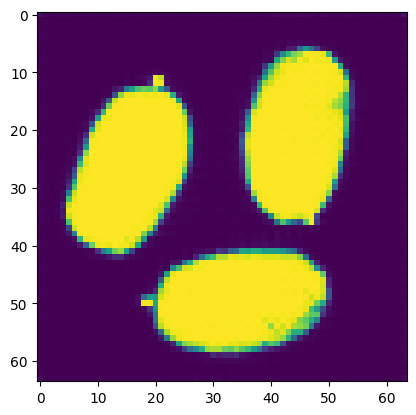

In [10]:
import matplotlib.pyplot as plt
plt.imshow(sample_img)

## Xmodal_loss

In [11]:
loss_cl = xmodalix._trainer._loss_fn
batch_dynamics = xmodalix._trainer._modality_dynamics
batch = next(iter(xmodalix._trainer._trainloader))
config = img_config
print(config.loss_reduction)


if cfg["LOSS_REDUCTION"] == "sum":
    distance_ab = distance_ab = torch.sum(  # Sum along samples
        torch.mean(
            torch.abs(
                latent_a[a_idx_paired, :]
                - latent_b[b_idx_paired, :]  # Select for paired
            ),
            dim=1,
        )  # Mean along Latent Dimensions
    )
elif cfg["LOSS_REDUCTION"] == "mean":
    distance_ab = torch.mean(
        torch.mean(
            torch.abs(
                latent_a[a_idx_paired, :]
                - latent_b[b_idx_paired, :]  # Select for paired
            ),
            dim=1,
        )  # Mean along Latent Dimensions
    )

if cfg["WEIGHTED_DISTANCE_LATENT"]:
    distance_ab = distance_ab * (
        latent_a.shape[0] / len(a_idx_paired)
    )  # Correct for missing overlap to mimick full overlap

mean


NameError: name 'cfg' is not defined

In [ ]:
latenspaces = {}
for k, v in batch_dynamics.items():
    latenspaces[k] = v["mp"].latentspace.detach()
    # latenspaces[k] = v["la"]
latenspaces

In [ ]:
sample_ids = {}
for k,v in batch.items():
    sample_ids[k] = v["sample_ids"]
    print(v.keys())
sample_ids

In [ ]:
from typing import Dict, Any

import torch
import itertools
from collections import defaultdict

def calculate_paired_loss(
    latentspaces: dict[str, torch.Tensor],
    sample_ids: dict[str, list],
    reduction: str = "mean",
    device: str = "mps"
) -> torch.Tensor:
    """
    Calculates the paired distance loss across all pairs of modalities in a batch.

    Args:
        latentspaces: A dictionary mapping modality names to their latent space tensors.
                      e.g., {'RNA': tensor_rna, 'ATAC': tensor_atac}
        sample_ids: A dictionary mapping modality names to their list of sample IDs.
        reduction: The type of reduction to apply ('mean' or 'sum').

    Returns:
        A single scalar tensor representing the total paired loss.
    """
    
    total_paired_loss = torch.tensor(0.0, device=device)
    modality_names = list(latentspaces.keys())
    
    # 1. Iterate through all unique pairs of modalities
    for mod_a, mod_b in itertools.combinations(modality_names, 2):
        
        ids_a = sample_ids[mod_a]
        ids_b = sample_ids[mod_b]
        
        # 2. Find the intersection of sample IDs
        common_ids = set(ids_a) & set(ids_b)
        
        if not common_ids:
            print("no common ids")
            continue # No overlapping samples for this pair, skip
            
        # 3. Create a mapping from sample ID to index for efficient lookup
        id_to_idx_a = {sample_id: i for i, sample_id in enumerate(ids_a)}
        id_to_idx_b = {sample_id: i for i, sample_id in enumerate(ids_b)}
        
        # Get the corresponding indices for the common samples
        indices_a = [id_to_idx_a[common_id] for common_id in common_ids]
        indices_b = [id_to_idx_b[common_id] for common_id in common_ids]
        
        # 4. Select the latent vectors for the paired samples
        paired_latents_a = latentspaces[mod_a][indices_a]
        paired_latents_b = latentspaces[mod_b][indices_b]
        
        # 5. Calculate the distance between the aligned latent vectors
        # L1 distance, averaged over latent dimensions and then over samples
        distance = torch.abs(paired_latents_a - paired_latents_b).mean(dim=1)
        
        if reduction == 'mean':
            pair_loss = distance.mean()
        elif reduction == 'sum':
            pair_loss = distance.sum()
        else:
            raise ValueError(f"Reduction must be 'mean' or 'sum', not {reduction}")
            
        # 6. Aggregate the loss
        total_paired_loss += pair_loss
        
    return total_paired_loss
    

In [ ]:
calculate_paired_loss(latentspaces=latenspaces, sample_ids=sample_ids)

## Imagix
If we want to use a standard image vae, we can use the Imagix pipeline. Note that only one image dataset is allowed here
**NOTE**:
set the datacase in config to DataCase.IMG_TO_IMG

In [ ]:
import autoencodix as acx
from autoencodix.utils.default_config import (
    DefaultConfig,
    DataConfig,
    DataCase,
    DataInfo,
)
import os

IMGROOT = os.path.join("data/images/ALY-2_SYS721/")
IMGMAPPING = os.path.join("data/ALY-2_SYS721_mappings.txt")
NUMFILE = os.path.join("data/AM3_NO2_raw_cell.tsv")

img_config2 = DefaultConfig(
    data_case=DataCase.IMG_TO_IMG,
    data_config=DataConfig(
        data_info={
            "IMG": DataInfo(
                file_path=IMGROOT,
                data_type="IMG",
            ),
            "ANNO": DataInfo(
                file_path=IMGMAPPING,
                data_type="ANNOTATION",
            ),
        },
    ),
)

imagix = acx.Imagix(config=img_config2)
imagix.preprocess()
imagix.fit()

In [ ]:
imagix.predict()

In [ ]:
r = imagix.result
r.final_reconstruction
sample_img = r.final_reconstruction.data[0, :, :, :]
sample_img = sample_img.squeeze()

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(sample_img.numpy())

### Old, maybe reuse code for getting stats, but seemd to work

In [ ]:
# Simple statistics tracking - just build the dict in your training loop

# Initialize stats dict once before training
stats = {}
for modality in trainset.datasets.keys():
    stats[modality] = {}
    for sample_id in trainset.datasets[modality].sample_ids:
        stats[modality][sample_id] = 0
print(stats)
# Training loop
epochs = 100

# Add this to your training loop
for epoch in range(100):  # Just test first 5 epochs
    batch_count = 0
    for batch_idx, batch in enumerate(dataloader):
        batch_count += 1

    print(f"Epoch {epoch}: {batch_count} batches processed")

    # Also check sampler length
    print(f"Sampler length: {len(sampler)}")
    print(f"Dataset length: {len(trainset)}")
    print(f"Paired samples: {len(trainset.paired_sample_ids)}")
    print(f"Unpaired samples: {len(trainset.unpaired_sample_ids)}")
    # # Reset stats for new epoch
    # for modality in stats:
    #     for sample_id in stats[modality]:
    #         stats[modality][sample_id] = 0

    for batch_idx, batch in enumerate(dataloader):
        # Update stats with current batch
        for modality, data in batch.items():
            if "sample_ids" in data:
                for sample_id in data["sample_ids"]:
                    if sample_id in stats[modality]:
                        stats[modality][sample_id] += 1

        # Your training code here
        # for modality, data in batch.items():
        #     if data["data"] is not None:
        #         outputs = models[modality](data["data"])

    # Print simple summary at end of epoch
    print("\nSampling Stats:")
    for modality in stats:
        counts = list(stats[modality].values())
        seen = sum(1 for c in counts if c > 0)
        total = len(counts)
        avg = sum(counts) / len(counts) if counts else 0
        print(f"  {modality}: {seen}/{total} samples seen, avg: {avg:.2f}")

    # Optional: Print unseen samples
    print("\nUnseen samples:")
    for modality in stats:
        unseen = [sid for sid, count in stats[modality].items() if count == 0]
        if unseen:
            print(
                f"  {modality}: {len(unseen)} unseen - {unseen[:5]}{'...' if len(unseen) > 5 else ''}"
            )

# Access raw stats anytime:
# stats = {
#     "img.IMG": {"T_98": 3, "T_138": 2, "T_183": 1, ...},
#     "multi_bulk.RNA": {"T_98": 4, "T_138": 3, "T_173": 2, ...},
#     ...
# }